# <u >Chapter 3: Introduction to fitting and model choices

<div class="alert alert-block alert-info">

### This Notebook will lead you through exercises to explore fitting data:

- learn how to perform least square minimization

- learn how to choose between models with different free parameter

- evaluate what level of model complexity is feasible

### Associated Material:

Check the FittingIntro pdf and recording that also explains the concepts introduced here.

### What's next:
after you have completed this notebook:

- model the dataset for your own science question

- make sure to make notes on what issues covered here you need to consider when fitting your lightcurve

- use the modelling toolbox to find relevant code
    
### Table of contents:

- [Backround](#sec:bg)
- [1. Goodness of fit - calculating $\chi^2$](#sec:chi2)
- [2. $\chi^2$ minimisation](#sec:chi2min)
- [3. model comparison](#sec:modelcomp)
- [Summary](#sec:summary)

<a id="sec:bg"></a>
## Background - What is the purpose of fitting and modelling?

In this notebook, we will consider the methods of fitting models to data, specifically, least square minimization. But before we go on to look into the detail, we will first consider why we are fitting data and therefore what choices should be made to ensure we are getting a reliable and meaningful answer.

Have a look at the following xkcd comic:

[How to choose your model](https://imgs.xkcd.com/comics/curve_fitting_2x.png)

Discuss the comic.

### Potential uses for fitting:

- parameter estimation when the underlying mathematical form is known. Example, finding the velocity of an object moving at constant velocity, e.g.: x(t) = a*t + x_0

- Model comparison. If the underlying physics are not known, determine which of several models fits the data best. Example: is a moving object accelarating or moving at constant velocity?

- Testing a specific model: testing if a spevific model fits the data. Example: is the moving object accelarating?

- Fit a discriptive model to data with unknown physics. Example: you have collected some new exiting data and would like to describe the data in a mathematical form.

### Potential dangers:

- Excessive complexity and overfitting: increasing the complexity of a model will result in an improvement in the fit. We will need to compensate for model complexity.

- Fitting a model to data, but failing to determine if it fits better than other possible models.

- Not reaching the global minimum: we will be varying the free parameters, this might not always lead to the best fit.

A common joke is that for noisy datasets, "you could fit an elephant to that data". This generally refers to a situation in which any sensibly complex model will fit the data, therefore not allowing to test for any specific model. You can see [How to fit an elephant to data](https://demonstrations.wolfram.com/FittingAnElephant/) here.

In [1]:
#Necessary imports
import numpy as np
import matplotlib.pyplot as plt
import LightCurveSimulator
#We will be testing these fits on the lightcurve you know from the LightCurveSimu notebook.
lc = LightCurveSimulator.ShortTransit()
lc.add_noise(sn=500)

<a id="sec:chi2"></a>
## 1. Goodness of fit: calculating $\chi^2$

We will be fitting a model to data, to determine how well a specific model fits, we can calculate $\chi^2$ or goodness of fit as follows:

$\chi^2 = \sum_{i} \dfrac{(y_i - f(x_i))^2}{\sigma_i^2}$

where $x_i, y_i, \sigma_i$ are the data and associated error and $f(x)$ is the model to evaulate. The smaller the $\chi^2$ value, the smaller the "distance" between the model and data.

<div class="alert alert-block alert-success">

### Your turn - calculating $\chi^2$ for a simple model.

Below you see a the simply noisy transit lightcurve we will be fitting here.

As a first step, write a function for a simple model in which there are the following free parameters:

- a baseline flux
- a flux during transit
- a transit start time
- a transit end time

You can get the time, flux and errors as follows:

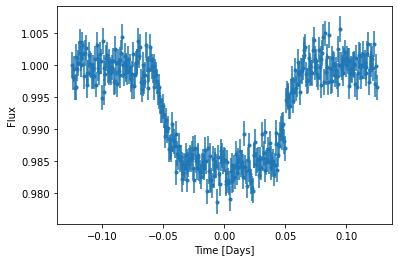

In [2]:
lc.plotlc_error()

<div class="alert alert-block alert-success">

### Your turn: Define a function for the model described above:

In [4]:
#def para(baseline, trans_flux, start, end):
#    return baseline -(baseline-trans_flux)*(end-start)
def para(x,a,b,c):
    return a*x**2 + b*x +c

<div class="alert alert-block alert-success">
    
### Your turn: calculate the $\chi^2$ for the model

In [5]:
def x_squared(function, ydata, error):
    total = sum((ydata-func)**2/error**2) 
    

<a id="sec:chi2min"></a>
## 2. $\chi^2$ minimization

You have now calculated the $\chi^2$ for a specific instance of the model. However, we are trying to minimize the $\chi^2$ to get the best fit. This is done through minization algorithms that vary input parameters to rech the minimum. We can fit the model above as follows using [scipy.otimize.curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html):

In [3]:
from scipy.optimize import curve_fit # import the fitting function

where func is the function to function to fit and needs to take the x values and paramaters as an input and return y. See the Toolbox for a more detailed example.

<div class="alert alert-block alert-success">

### Your turn: fit your example lightcurve using the simple model above

- plot the best fit over your data
- you can rerun the fit at higher and lower signal-to-noise and see how the errors change
- try fitting the data with unrelistic starting values

<div class="alert alert-block alert-success">

### Your turn: Residuals

Residuals can be useful for assessing a fit. Try plotting the difference between model and data, are there any regions that are poorly fit?

### Danger: local minima 

It is important to inspect your fitting results carefully, you might heva reacherd a localk minimum that only poorly fits the data.

<a id="sec:modelcomp"></a>

## 3. Model comparison

In many cases, we might have several models, for example, we could have different models for the shape of the transit. Alternatively, we might have a model with a range of different free parameters. We will need to compare these different models.

<div class="alert alert-block alert-success">

### Your turn: Testing model comparison

Fit the following models to the lightcurve:

- a straight line
- the step model
- a >6th order polynamial (play around to see what works, you can use [numpy.polyfit](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html))

Note down the $\chi^2$ values. Which provides the best fit according to the $\chi^2$? Which do you think is the best fit? 

## Goodness-of-fit and degrees of freedom

As you see increasing the complexity of the model leads to a better fits, but this can be due to the fact that your simply allowing too many free parameters. To compare different models, we can use the reduced $\chi^2$ For thise we need the degree of freedom $\nu$, this is the number of data points minus number of free paramaters in the fit - 1:

$\chi_{red} = \dfrac{\chi^2}{\nu-n_{param}-1}$


<div class="alert alert-block alert-success">

### Your turn: Compare the reduced $\chi^2$, which is the best parameters.

<div class="alert alert-block alert-info">
    
<a id="sec:summary"></a>
## Summary:

After completing this notebook, you should have:

- applied your knowledge on fitting and model comparison
- use the modelling toolboox to apply this to your own data